In [35]:
import pandas as pd
data=pd.read_csv("CC.csv")
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [36]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [62]:
data1 =data.dropna()
data1.isnull().sum()
D2=data1.drop(['BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'],axis=1)
D2

,BALANCE,PAYMENTS,TENURE
0,40.900749,201.802084,12
1,3202.467416,4103.032597,12
2,2495.148862,622.066742,12
4,817.714335,678.334763,12
5,1809.828751,1400.057770,12
...,...,...,...
8943,5.871712,58.644883,6
8945,28.493517,325.594462,6
8947,23.398673,81.270775,6
8948,13.457564,52.549959,6


# 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [73]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data1)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [74]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8631,0
8632,0
8633,0
8634,0


# 3. Plot the clusters. 

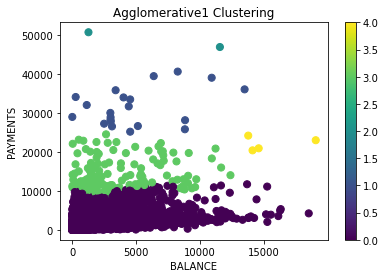

In [80]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (D2 ['BALANCE'] , D2["PAYMENTS"],c=agglomerative1[0],s=50)
ax.set_title("Agglomerative1 Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

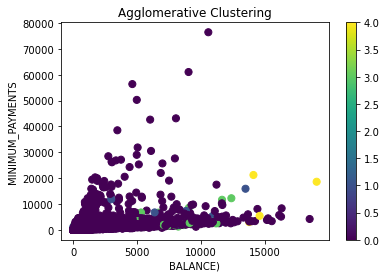

In [79]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data1 ['BALANCE'] , data1["MINIMUM_PAYMENTS"],c=agglomerative1[0],s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE)")
ax.set_ylabel("MINIMUM_PAYMENTS")
plt.colorbar(scatter)

In [ ]:
d2=data.drop("CustomerID", axis=1)

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (D2 ['BALANCE'] , D2["PAYMENTS"],c=agglomerative1[0],s=50)
ax.set_title("Agglomerative1 Clustering")
ax.set_xlabel("BALANCE)")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

# 4. Plot the dendrogram. Use K-means clustering

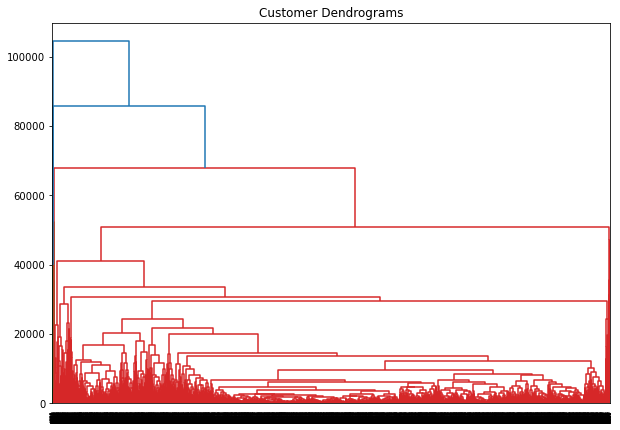

In [41]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [42]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

# 5. Try different K values and select the best one

In [44]:
kmeans.predict(data)
print(kmeans.cluster_centers_)#Printing the coordinates of cluster centers.

[[1.66503019e+03 9.14361713e-01 1.47503260e+03 9.18786902e+02
  5.56646307e+02 8.28890360e+02 5.85030946e-01 3.32812272e-01
  4.06692380e-01 1.18189873e-01 2.76840364e+00 2.11641853e+01
  6.85898940e+03 2.03803373e+03 6.51760367e+02 2.01143389e-01
  1.17613730e+01]
 [5.53273664e+03 9.61557868e-01 1.53395581e+03 9.31219725e+02
  6.02812772e+02 3.87556288e+03 4.71996835e-01 2.62135945e-01
  3.51735457e-01 3.31860533e-01 9.79839633e+00 2.14891180e+01
  1.09134645e+04 4.08273785e+03 1.98483863e+03 6.94990561e-02
  1.16712486e+01]
 [4.81833846e+03 9.15015009e-01 1.18136954e+04 8.44763973e+03
  3.36625387e+03 5.20289245e+03 7.72304108e-01 6.27834342e-01
  6.15939333e-01 2.06865937e-01 8.84684685e+00 8.97837838e+01
  1.26891892e+04 1.89200826e+04 2.45458930e+03 3.59580649e-01
  1.18558559e+01]
 [8.21415192e+02 8.73775090e-01 4.99297450e+02 2.39657323e+02
  2.59953639e+02 4.97000151e+02 4.52674155e-01 1.29540009e-01
  3.48045573e-01 1.12877530e-01 2.36258661e+00 9.44457275e+00
  2.18507260e+03

In [52]:
Sum_of_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    Sum_of_squared_distances.append(km.inertia_) 

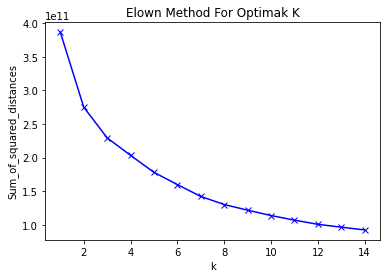

In [55]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elown Method For Optimak K')
plt.show()

In [56]:
#Le best K-values est 2
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

# 7. Compare the two results. 